In [7]:
import os
from my_json_helper import read_all_json_files_to_dataframe

In [17]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
dir_path = os.path.join('./', 'data', 'daily_summaries')
summaries_df = read_all_json_files_to_dataframe(dir_path)
summaries_df


Error reading ./data/daily_summaries/.gitkeep: Expecting value: line 1 column 1 (char 0)


,date,datatype,station,attributes,value,source
0,2018-01-23T00:00:00,PRCP,GHCND:US1DENC0002,",,N,0700",58,daily_summaries_FIPS10003_jan_2018_1.json
1,2018-01-23T00:00:00,SNOW,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
2,2018-01-23T00:00:00,SNWD,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
3,2018-01-23T00:00:00,WESD,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
4,2018-01-23T00:00:00,WESF,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
...,...,...,...,...,...,...
1381,2018-01-22T00:00:00,WDF2,GHCND:USW00013781,",,W,",150,daily_summaries_FIPS10003_jan_2018_0.json
1382,2018-01-22T00:00:00,WDF5,GHCND:USW00013781,",,W,",160,daily_summaries_FIPS10003_jan_2018_0.json
1383,2018-01-22T00:00:00,WSF2,GHCND:USW00013781,",,W,",54,daily_summaries_FIPS10003_jan_2018_0.json
1384,2018-01-22T00:00:00,WSF5,GHCND:USW00013781,",,W,",63,daily_summaries_FIPS10003_jan_2018_0.json


In [ ]:
# display a summary of df_daily_summaries
summaries_df.shape

(1386, 6)

How many stations are there in total for FIPS10003

In [ ]:
# returns the number of unique stations in the dataframe
# summaries_df['station'].unique() -- creates a list of unique stations
summaries_df['station'].nunique()

17

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [48]:
# create a new dataframe with only the TMAX data
temps_max = summaries_df[summaries_df['datatype'] == 'TMAX']
#temps_max = temps_max.rename(columns={'value': 'max_temp'}) # next time don't do this
columns_to_drop = ['station', 'attributes', 'source', 'datatype']
temps_max.drop(columns=columns_to_drop, inplace=True) # inplace=True modifies the original dataframe, not creating a copy
temps_max

/var/folders/98/9_hfbx1j37d31269lt42l9b40000gp/T/ipykernel_38803/777746967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_max.drop(columns=columns_to_drop, inplace=True) # inplace=True modifies the original dataframe, not creating a copy


,date,value
33,2018-01-23T00:00:00,172
76,2018-01-24T00:00:00,72
119,2018-01-25T00:00:00,28
163,2018-01-26T00:00:00,39
206,2018-01-27T00:00:00,150
242,2018-01-28T00:00:00,133
291,2018-01-29T00:00:00,78
334,2018-01-30T00:00:00,39
380,2018-01-31T00:00:00,6
428,2018-01-01T00:00:00,-60


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [49]:
# using describe() to get a summary of the max_temp column
temps_max.describe()

,value
count,31.000000
mean,48.193548
std,77.768640
min,-88.000000
25%,-2.500000
50%,39.000000
75%,125.000000
max,172.000000


Let's graph this DataFrame so we can get a visual representation for this information.

In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

In [50]:
xmax = temps_max['date'].str[8:10]
ymax = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

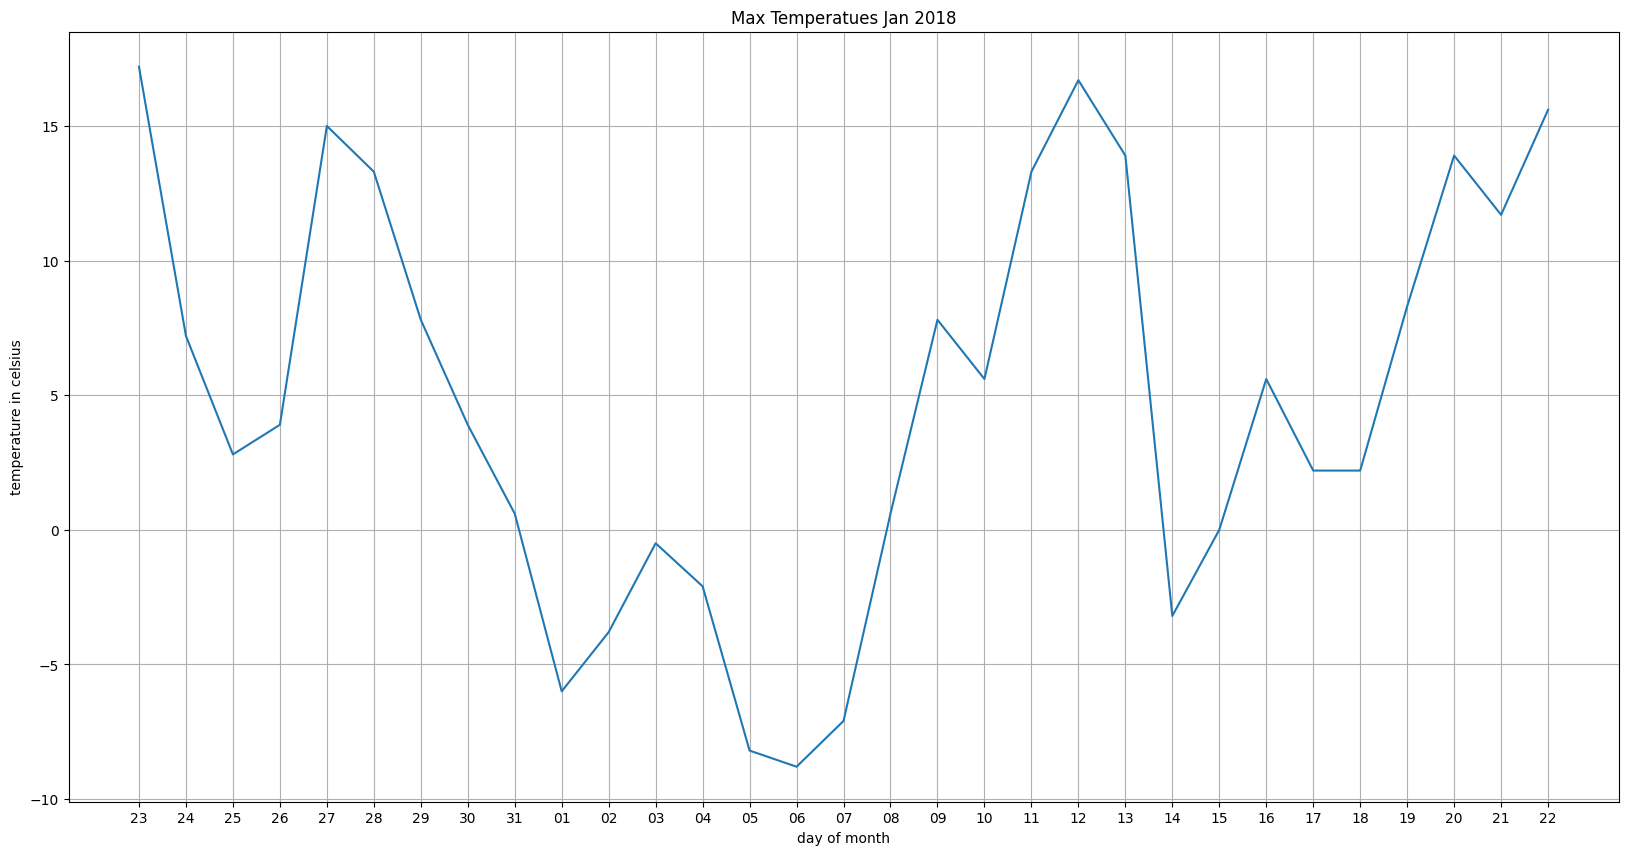

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(xmax, ymax)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [39]:
## create a new dataframe with only the TMIN data
temps_min = summaries_df[summaries_df['datatype'] == 'TMIN']
temps_min.drop(columns=columns_to_drop, inplace=True) # inplace=True modifies the original dataframe, not creating a copy


/var/folders/98/9_hfbx1j37d31269lt42l9b40000gp/T/ipykernel_38803/1487282810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_min.drop(columns=columns_to_drop, inplace=True) # inplace=True modifies the original dataframe, not creating a copy


In [40]:
temps_min

,date,value
34,2018-01-23T00:00:00,44
77,2018-01-24T00:00:00,6
120,2018-01-25T00:00:00,-38
164,2018-01-26T00:00:00,-66
207,2018-01-27T00:00:00,-49
243,2018-01-28T00:00:00,72
292,2018-01-29T00:00:00,33
335,2018-01-30T00:00:00,-55
381,2018-01-31T00:00:00,-93
429,2018-01-01T00:00:00,-149


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [41]:
# 
temps_min.describe()

,value
count,31.000000
mean,-55.225806
std,65.749378
min,-166.000000
25%,-102.000000
50%,-66.000000
75%,-24.000000
max,83.000000


Graph the temps_min DataFrame

In [44]:
# 
xmin = temps_min['date'].str[8:10]
ymin = temps_min['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min Temperatues Jan 2018')]

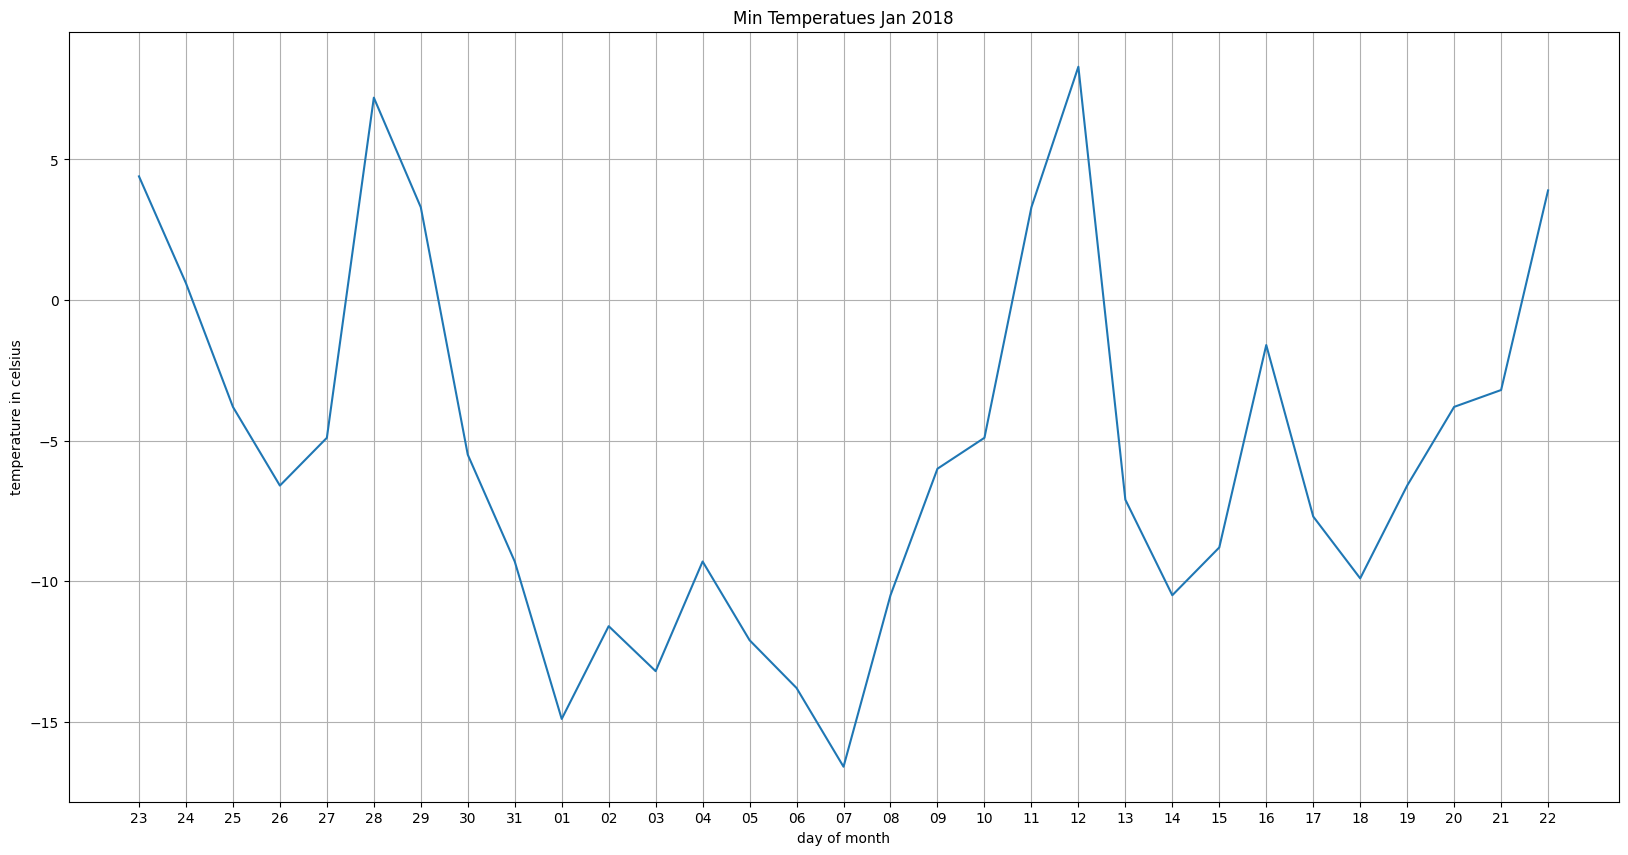

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(xmin, ymin)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatues Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

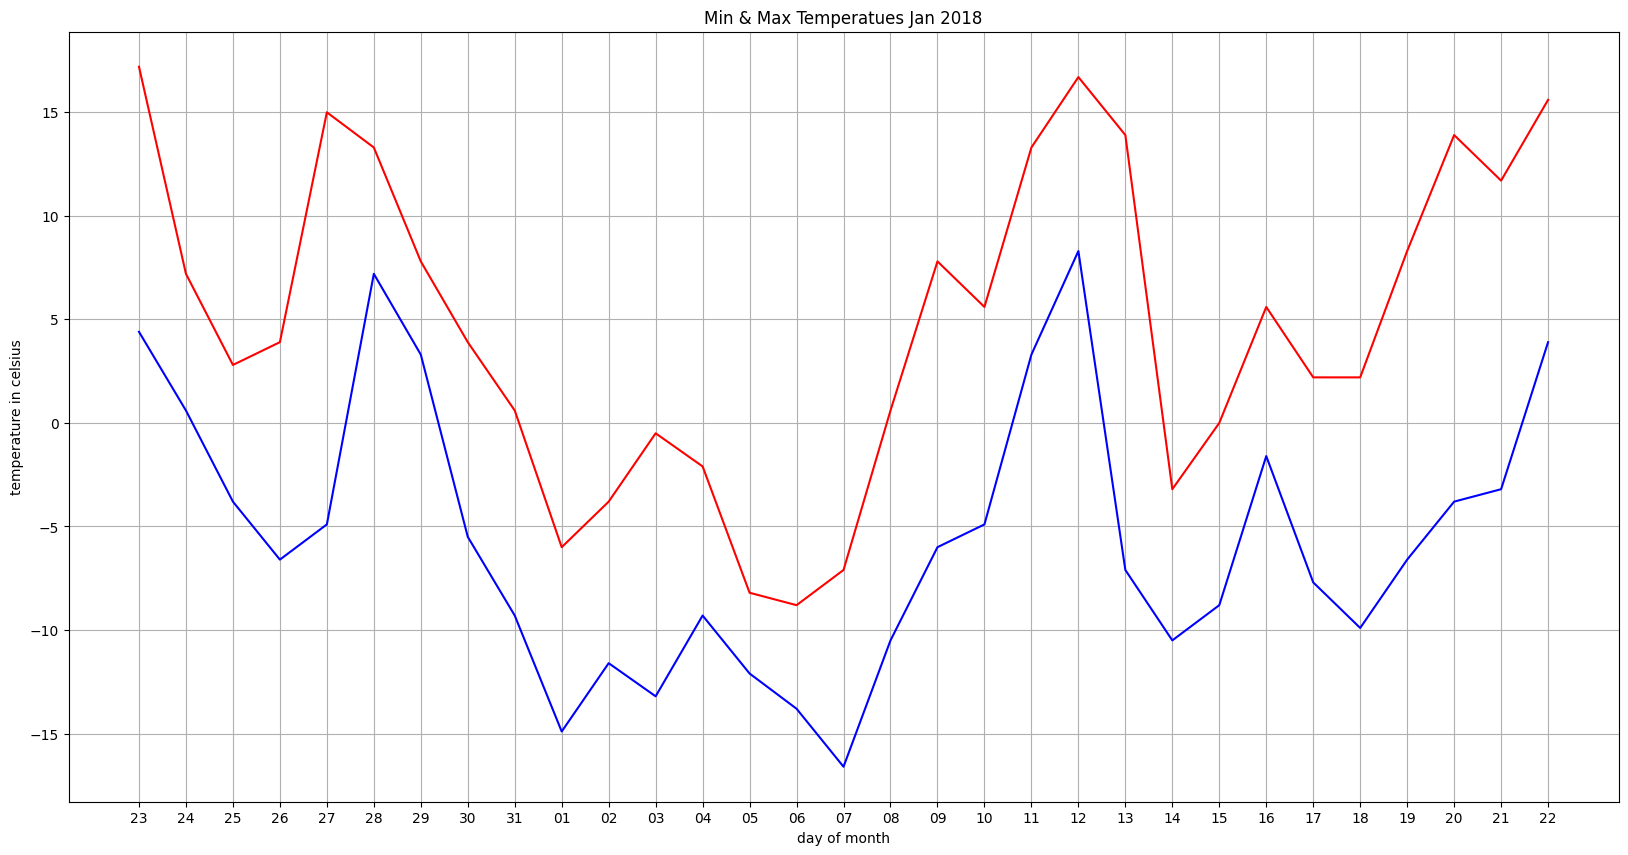

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')